<a href="https://colab.research.google.com/github/anjum166/anjum166/blob/main/Pomegranet_disease_prediction_using_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle\ \(1\).json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle (1).json to kaggle (1) (1).json


In [ ]:
!kaggle datasets download -d sujaykapadnis/pomegranate-fruit-diseases-dataset
!unzip pomegranate-fruit-diseases-dataset.zip -d pomegranate_data


Streaming output truncated to the last 5000 lines.
  inflating: pomegranate_data/Pomegranate Fruit Diseases Dataset for Deep Learning Models/Pomegranate Diseases Dataset/Pomegranate Diseases Dataset/Alternaria/IMG_20230916_113709_1.jpg  
  inflating: pomegranate_data/Pomegranate Fruit Diseases Dataset for Deep Learning Models/Pomegranate Diseases Dataset/Pomegranate Diseases Dataset/Alternaria/IMG_20230916_113711_1.jpg  
  inflating: pomegranate_data/Pomegranate Fruit Diseases Dataset for Deep Learning Models/Pomegranate Diseases Dataset/Pomegranate Diseases Dataset/Alternaria/IMG_20230916_113720_1.jpg  
  inflating: pomegranate_data/Pomegranate Fruit Diseases Dataset for Deep Learning Models/Pomegranate Diseases Dataset/Pomegranate Diseases Dataset/Alternaria/IMG_20230916_113722_1.jpg  
  inflating: pomegranate_data/Pomegranate Fruit Diseases Dataset for Deep Learning Models/Pomegranate Diseases Dataset/Pomegranate Diseases Dataset/Alternaria/IMG_20230916_113724.jpg  
  inflating: pom

In [ ]:
import os

data_path = r"pomegranate_data/Pomegranate Fruit Diseases Dataset for Deep Learning Models/Pomegranate Diseases Dataset/Pomegranate Diseases Dataset"


In [ ]:
# 📌 STEP 3: Load and preprocess the dataset
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder

data = []
labels = []
img_size = (64, 64)

dataset_path = "pomegranate_data/Pomegranate Fruit Diseases Dataset for Deep Learning Models/Pomegranate Diseases Dataset/Pomegranate Diseases Dataset"

for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    for img_file in os.listdir(label_path):
        try:
            img_path = os.path.join(label_path, img_file)
            img = Image.open(img_path).resize(img_size).convert('RGB')
            data.append(np.array(img).flatten())  # Flatten for decision tree
            labels.append(label)
        except:
            continue

X = np.array(data)
y = np.array(labels)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
# 📌 STEP 4: Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [68]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion='entropy',        # Better than gini for text/image class
    max_depth=50,               # Avoid overfitting and underfitting
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=2,
                       min_samples_split=4, random_state=42)

In [67]:
# 📌 STEP 6: Predict and Evaluate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.703921568627451
Precision: 0.7020937216268811
Recall: 0.703921568627451
F1 Score: 0.7028354797531926

Classification Report:

                  precision    recall  f1-score   support

      Alternaria       0.53      0.53      0.53       177
     Anthracnose       0.74      0.77      0.75       234
Bacterial_Blight       0.65      0.62      0.63       193
      Cercospora       0.56      0.55      0.55       126
         Healthy       0.88      0.89      0.88       290

        accuracy                           0.70      1020
       macro avg       0.67      0.67      0.67      1020
    weighted avg       0.70      0.70      0.70      1020



<ipython-input-70-2331540844>:21: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


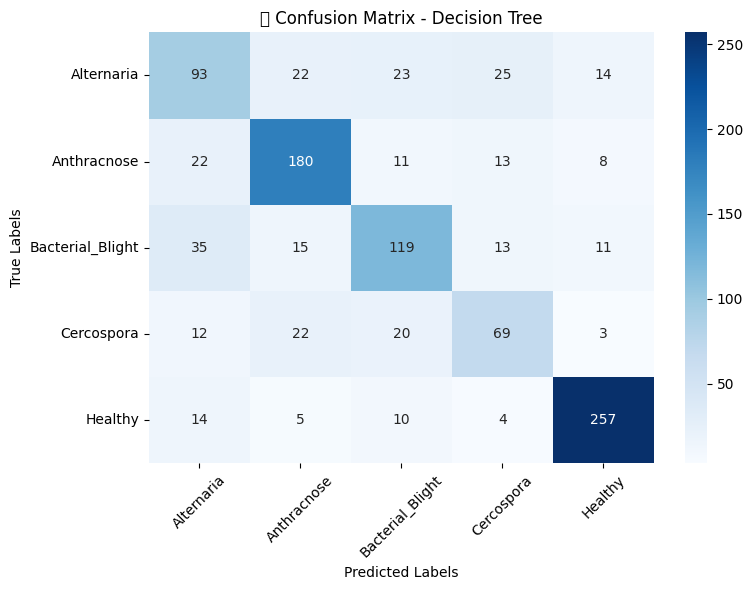

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class names from LabelEncoder
class_names = le.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('📌 Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-69-1443027697>:26: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


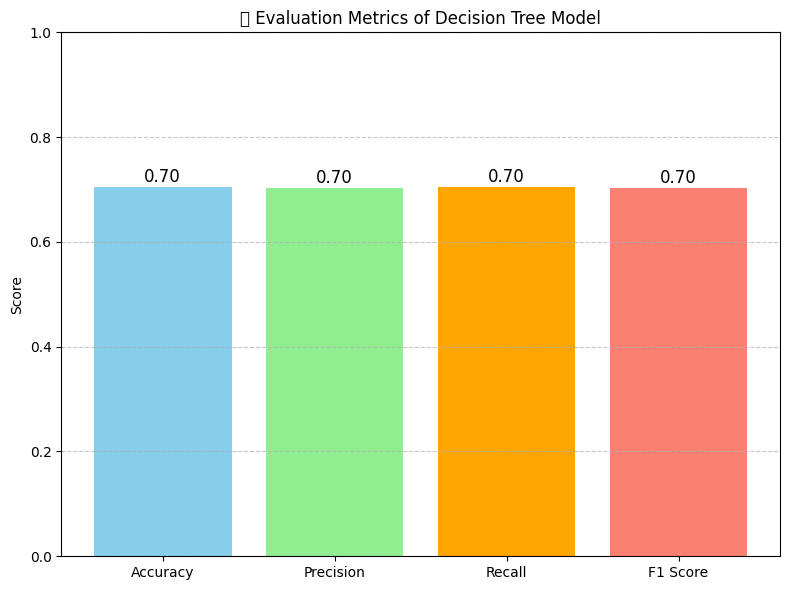

In [69]:
import matplotlib.pyplot as plt

# Metrics values from your results
accuracy = 0.7039
precision = 0.7021
recall = 0.7039
f1 = 0.7028

# Metric names and values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'orange', 'salmon'])
plt.ylim(0, 1)  # 0% to 100%
plt.title('📈 Evaluation Metrics of Decision Tree Model')
plt.ylabel('Score')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
